# The EP full-text library - Lesson 1
This notebook is an introduction to the EP full-text library in TIP. The EPO publishes the patent applications and grated patents weekly and currently they amount to 7,3 million publications since 1978.  With the EP full-text library you can now now retrieve those A and B publications in TIP. The implementation of the EP full-text library in TIP is called EPAB. We will use the name EPAB throughout the rest of the course.

## Importing the EPAB library
The first step to work with EPAB is to import the library, which is pre-installed in your TIP workspace. When you create an instance of the EPAB client, you get access to a test database of around 10 thousand publications. This reduces the size of the results we get, when creating our data analysis notebooks. Once you are ready to run the real analysis, you can access the full database of over 7 million documents with the `env='PROD'` argument in the `EPABClient()` method. 

In [1]:
# Importing the EPAB client
from epo.tipdata.epab import EPABClient

# creating an instance of the EPAB client with the TEST database
epab = EPABClient(env='PROD')

print (epab)

## Our first query
The EPAB client we just instantiated  is an object that comes loaded with methods allowing you to perform queries in the database of publications. Let's run our first query. We will search for patents that were granted (document kind B1) in January 2018. Do not worry about understanding the structure of the query, we will dive into that later in this course

In [2]:
# we run the query_publication method of the epab class that we instantiated above, passing some query parameters and store it in a var called q
q = epab.query_publication(number="%", kind_code="B1", date="20180101-20180131")

# seeing that q is an object
print (type(q))



<class 'epo.tipdata.epab.query.Query'>


In [3]:
# you can also print the query and get the number of publications found
print ('We can also print the result of the query:', q)

We can also print the result of the query: 9345 publications


### Understanding queries
Let's take a look at what happened in the cell above. We have run a query on our object epab, and as a result we have generated a new object called q. This is a fundamental principle of the EPAB client. When you run a query, you do not get a list of results immediately. What you get is an object that contains a reference to the publications that result from that query. To get the results, you need to run the method `get_results()` on the query object and specify what information you want to get for each of the publications in the query. 

Before we start retrieving publications from the query, we need to understand the data fields available for each publication. The best way is to run the method `fields()` on the epab object.

In [12]:
epab.fields()

WidDatabaseFields(header='', input_data={'': [{'name': 'epab_doc_id', 'type': 'STRING', 'mode': 'REQUIRED', 'd…

## The EPAB data structure
When looking at the data structure above, you can see that the amount of information that you can retrieve with EPAB is quite large, with many fields in the data structure of each publication. To organize all this data, the fields are organized in levels. For example the fields `application.number` and the `application.date` are nested in a super field called `application`. You can get the results with information at field level, or super field level. Let's see an example of getting the results of all the fields of a super field.

In [13]:
# getting the results with the super field application
q.get_results("application")

,application.number,application.filing_date
0,06721574.9,20060201
1,07380184.7,20070626
2,08734614.4,20080314
3,06450127.3,20060912
4,08150992.9,20080202
...,...,...
9340,10825797.3,20101023
9341,11826254.2,20110923
9342,11835198.0,20111021
9343,12180553.5,20120815


The first thing you notice,if you are familiar with working with data in Jupyter, is that the results are presented in a DataFrame. More on this later. You can see that by running `q.get_results("application")` we get two the two fields nested in the `application` super field. What if we want to get only the application number? We can get the results with that field only.

In [14]:
# getting the results with the application number only
q.get_results("application.number")

,application.number
0,12848361.7
1,12851687.9
2,12852260.4
3,12869142.5
4,13003519.9
...,...
9340,10825797.3
9341,11826254.2
9342,11835198.0
9343,12180553.5


### Results with combined (super) fields
When executing the `get_results` method you can freely combine fields and super fields. See the example below where we get the `application.number`, the entire super field `representative` and from the super field `title` we get only the English one as `title.en`. 

In [15]:
q.get_results("application.number, representative, title.en")

,application.number,representative.name,representative.address,representative.city,representative.country,title.en
0,06721574.9,Abel & Imray,Westpoint Building \nJames Street West,Bath BA1 2DA,GB,MOBILE COMMUNICATION DEVICE WITH MUSIC INSTRUM...
1,07380184.7,"Ungria López, Javier","Avda. Ramón y Cajal, 78",28043 Madrid,ES,Clutch mechanism couplable to door locks with ...
2,08734614.4,"Schnappauf, Georg",ZSP Patentanwälte PartG mbB \nHansastraße 32,80686 München,DE,MONOCLONAL ANTIBODIES AGAINST GT468 FOR TREATM...
3,06450127.3,Schwarz & Partner Patentanwälte OG,Patentanwälte \nWipplingerstraße 30,1010 Wien,AT,Apparatus and method for mobile contactless me...
4,08150992.9,"Maier, Daniel Oliver",Siemens AG \nPostfach 22 16 34,80506 München,DE,Order tracking method and system
...,...,...,...,...,...,...
9340,11179903.7,"Forrest, Graham Robert",Mewburn Ellis LLP,City Tower\n40 Basinghall Street\nLondon EC2V 5DE,GB,Method for improving antibody
9341,15189224.7,"Kiddle, Simon John",Mewburn Ellis LLP,City Tower\n40 Basinghall Street\nLondon EC2V 5DE,GB,FILAMENTOUS FUNGI HAVING AN ALTERED VISCOSITY ...
9342,11782457.3,"Naylor, Matthew John",Mewburn Ellis LLP,City Tower\n40 Basinghall Street\nLondon EC2V 5DE,GB,"COMPOSITE LOAD BEARING PANELS, RESIN-IMPREGNAT..."
9343,10252133.3,"Stoner, Gerard Patrick",Mewburn Ellis LLP,City Tower\n40 Basinghall Street\nLondon EC2V 5DE,GB,Titania-doped quartz glass and making method


### Limiting the amount of results
When working with large results lists, sometimes you want to see a subset of those results. For that you can pass a `limit` parameter to the method.

In [17]:
# getting the first 10 results only
q.get_results("application.number")

,application.number
0,12848361.7
1,12851687.9
2,12852260.4
3,12869142.5
4,13003519.9
...,...
9340,10825797.3
9341,11826254.2
9342,11835198.0
9343,12180553.5


## Data formats
We have seen that the default output of the `get_results` method is a DataFrame. There are other ways to get the data using the `output_type`parameter: 

- **List** : Data are embedded in a simple, plain **list of dictionaries**, for ensuring maximum Python compatibility and exchangeability.
- **Datagrid**: For tabular visualization in an **Excel-like** widget, which allows simple filtering, sorting etc. (currently still limited)
- **Widgets**: A list of reusable **ipywidgets** component, for advanced single-record visualization 

### Getting results as a list
Sometimes it will be more useful to get the results as a list of dictionaries. One example is when displaying the results of fields that can contain multiple entries, such as the applicant. Let's first see what happens when we display the applicant field in a DataFrame. 

In [21]:
# getting the applicant super field 
q.get_results("applicant", limit = 5)

,applicant
0,"[{'name': 'Gilead Apollo, LLC', 'address': '33..."
1,"[{'name': 'Novozymes Inc.', 'address': '1445 D..."
2,[{'name': 'Biophore India Pharmaceuticals Pvt....
3,"[{'name': 'Bloomage Freda Biopharm Co. Ltd.', ..."
4,"[{'name': 'MYLAN LABORATORIES LIMITED', 'addre..."


We can see that the applicant super field is a list of dictionaries. This is because one publication can list multiple applicants, and each applicant has a name, address, etc. In this case, when working with applicants, it is probably more practical to get the plain python list.

In [19]:
q.get_results ("applicant", output_type= 'list', limit = 5)

[{'applicant': [{'name': 'Gilead Apollo, LLC',
    'address': '333 Lakeside Drive',
    'city': 'Foster City CA 94404',
    'country': 'US'}]},
 {'applicant': [{'name': 'Novozymes Inc.',
    'address': '1445 Drew Avenue',
    'city': 'Davis, CA 95616',
    'country': 'US'}]},
 {'applicant': [{'name': 'Biophore India Pharmaceuticals Pvt. Ltd.',
    'address': 'Plot 193 \nPremises 5-35/50 \nPrashant Nagar \nKukatpally',
    'city': 'Hyderabad 500 072',
    'country': 'IN'}]},
 {'applicant': [{'name': 'Bloomage Freda Biopharm Co. Ltd.',
    'address': 'No.678 Tianchen Street \nHi-Tech Development Zone \nJinan',
    'city': 'Shandong 250101',
    'country': 'CN'}]},
 {'applicant': [{'name': 'MYLAN LABORATORIES LIMITED',
    'address': 'Plot No. 564/A/22, Road No. 92 \nJubilee Hills \nHyderabad',
    'city': '500033 Andhra Pradesh',
    'country': 'IN'}]}]

### Getting results as Datagrids
You can also get the results displayed in a Datagrid. This format is very useful when you get tabular data, and is very similar to a spreadsheet table. You can use it to sort, filter, and process the data in the table much as you would do in a spreadsheet. 

In [22]:
# getting results as a Datagrid
q.get_results('application.number, application.filing_date, representative.name', output_type='datagrid')

DataGrid(auto_fit_columns=True, auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_render…

## Types of queries
There are two ways to query the EPAB library, via pre-built query methods or with SQL queries. This section will show all the pre-built queries that you can use with EPAB.

### Querying by publication fields
Running the `fields()` method we saw above you can see that the `publication` super field contains several fields, see the list below. We can combine those fields in a single query, or we can use individual query methods for each field. 

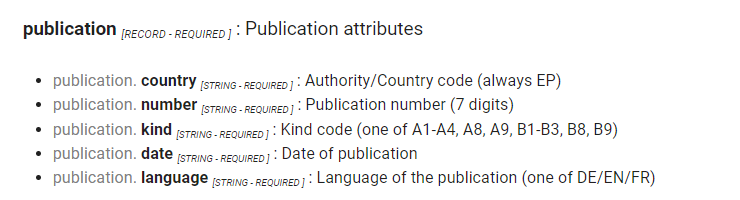

You can combine number, kind, date range and language in a query with the `query_publication()` method. Please bear in mind that the number is a mandatory parameter, you can enter `%` in that parameter if you are not interested in searching for a specific application number. In the example below we search for granted patents (kindcode B1) where the grant was published in 2018. Please note that you need to enter a date range, and not a specific date. The format of the date range is `yyyymmdd-yyyymmdd`.

In [23]:
# querying for any publication number, granted patents, and the whole year 2018 as the publication date range. 
q = epab.query_publication(number="%", kind_code="B1", date="20180101-20180131")

# printing the amount of communications
print(q)

# displaying the first 5 publications with all the fields of the publication super field
q.get_results("publication", limit=5)

9345 publications


,publication.country,publication.number,publication.kind,publication.date,publication.language
0,EP,1537309,B1,20180110,EN
1,EP,1558533,B1,20180110,EN
2,EP,1579348,B1,20180110,EN
3,EP,1641431,B1,20180110,EN
4,EP,1725116,B1,20180110,EN


#### Querying by individual publication fields
You can also query individual fields of the publication super field. This type of individual queries can be very useful when combining queries, which we will see later. Below we see the methods for querying the language or the publication kind. 

In [24]:
# getting all the A1 publications
q = epab.query_publication_kind_code("A1")
print(q)
q.get_results("publication.kind, publication.number", limit=5)

3320473 publications


,publication.kind,publication.number
0,A1,0225951
1,A1,0226029
2,A1,0226032
3,A1,0226175
4,A1,0226236


In [25]:
# getting all the French and German publications
q = epab.query_publication_language("FR,DE")
print(q)
q.get_results("publication", limit=5)

1857733 publications


,publication.country,publication.number,publication.kind,publication.date,publication.language
0,EP,2782914,A1,20141001,DE
1,EP,2784347,A1,20141001,DE
2,EP,2783919,A1,20141001,DE
3,EP,2784298,A1,20141001,DE
4,EP,0762339,A2,19970312,DE


#### Querying by publication dates
Querying by the publication date can be done with a range or with a specific date. 

In [26]:
# getting the publications for a specific date
q = epab.query_publication_date("20180103")
print(q)
q.get_results("publication", limit=5)

5838 publications


,publication.country,publication.number,publication.kind,publication.date,publication.language
0,EP,3263164,A1,20180103,DE
1,EP,3263292,A1,20180103,EN
2,EP,3263594,A1,20180103,EN
3,EP,3263569,A1,20180103,EN
4,EP,3263434,A1,20180103,EN


In [ ]:
# getting the publications for a January 2018
q = epab.query_publication_date("20180101-20180131")
print(q)
q.get_results("publication", limit=5)

#### Querying by dates with truncation
An easy way to enter a date range such as a given year or month is to use truncation

In [27]:
# getting the publications for January 2018 with truncation
q = epab.query_publication_date("201%")
print(q)
q.get_results("publication", limit=5)

2461089 publications


,publication.country,publication.number,publication.kind,publication.date,publication.language
0,EP,2370513,A1,20111005,EN
1,EP,2372925,A1,20111005,EN
2,EP,2370523,A1,20111005,DE
3,EP,2370443,A1,20111005,EN
4,EP,2370450,A1,20111005,EN


### Querrying by application fields
Similarly to what we can do with the fields within the `publication` super field, we can query EPAB with fields within the `application` super field. Again, we can combine several fields or query individual fields. One important note is that when querying for applications, the date field is the **filing date**. 

In [ ]:
# getting all the applications filed in April 2016
q = epab.query_application(number="%", date="20160401-20160430")
print(q)
q.get_results("application", limit=5)

A very important aspect to consider, when querying application fields, is that one application will typically generate more than one publication. This is clearly illustrated in the example below. For one application number you get two publications, the A1 and the B1.

In [ ]:
q = epab.query_application(number ='16163495.1')
q.get_results("application, publication.kind", limit=5)

#### Querying by individual application fields

In [ ]:
# getting all the applications with numbers starting in 167
q = epab.query_application_number("167%")
print(q)
q.get_results("application", limit=5)

In [ ]:
# getting publications from applications filed on 02-02-16
q = epab.query_application_filing_date("20160202")
print(q)
q.get_results("publication.number, application.number", limit=5)

### Querying by parties
As you have seen with the `fields` method, the EPAB database contains fields about inventors, applicants, and representatives. Please note that a publication may mention more than one inventor and applicant. However, although the applicant may appoint more than one representative, only the first representative on record is shown in EPAB.

The consequence of this is that the super fields `inventor` and `applicant` contain a list of dictionaries, with the fields for each individual applicant or inventor stored in a dictionary within the list. This is very important for visualizing and processing data about applicants and inventors. 

#### Querying by inventor fields
The `inventor` super field contains the name, address, city, and country of each inventor. You can query by any of those fields with the dedicated methods. There is no general query for inventor fields. 

In [ ]:
# getting all the publications naming one inventor called Elon Musk
# and yes, there  is one patent granted to THE Michael Jackson as an inventor. 
q = epab.query_inventor_name("%Michael Jackson%")
print(q)

# we get the results as a list, to visualize the nested data structure of inventors
q.get_results("publication, inventor", limit=2, output_type='list')

In [ ]:
# getting all the pubilcations naming one inventor with residence in Madrid
q = epab.query_inventor_city("%Madrid%")
print(q)


q.get_results("inventor.city", output_type="list", limit=2)

#### Country fields
All the fields that contain country information--for applicants, inventors and representatives--contain two leter codes as defined by the [ISO 3166 Standard](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2)D

In [ ]:
# getting all the publications naming one inventor with residence in Italy
q = epab.query_inventor_country("GR, IT")
print(q)
q.get_results(" inventor.country", limit=5,  output_type="list")

#### Querying by applicant or representative fields
The methods for querying by applicant or representative fields are the same as for inventor fields. Simply substitute `inventor` by `applicant` or `representative`in the method name.

In [ ]:
# getting publications where the representative has their business place in Italy

q = epab.query_representative_country("%IT%")
print(q)

# note that the representative field does not contain a list, but a single representative per publication
q.get_results("representative", limit=5)

In [ ]:
# getting publications naming one applicant with their business place in Italy

q = epab.query_applicant_country("%IT%")
print(q)

# note that the applicant field does not contains a list with one or more 
q.get_results("representative", limit=5)

### Querying by classification symbols
EPAB contains information about the classification symbols assigned to the applications corresponding to the applications we can retrieve. There are fields for the Cooperative Patent Classification (CPC), and for the International Patent Classification. The data structure for classification symbols is similar to the applicant or inventor super fields. Each publication can--annd typically will--display more than one classification symbol. They are, therefore, stored in a list of dictionaries. In this section it is expected that the user is familiar with the CPC and IPC nomenclature. 

Querying by CPC and IPC fields is similar, simply change `ipc` for `cpc` and vice-versa.

In [5]:
# Let's look for all the publications having one of two possible IPC symbols assigned 

q = epab.query_ipc(symbol="H04W36%, H04L12%")
print(q)
#notice the nested nature of the IPC data
q.get_results("ipc.symbol", output_type="list", limit=5)

122213 publications


[{'ipc': [{'symbol': 'H04L12/28'}]},
 {'ipc': [{'symbol': 'H04L12/56'}, {'symbol': 'H04L1/00'}]},
 {'ipc': [{'symbol': 'H04L12/46'}]},
 {'ipc': [{'symbol': 'H04L12/46'}]},
 {'ipc': [{'symbol': 'H04L12/46'}, {'symbol': 'H04L12/24'}]}]

In [6]:
# We can also find all publications having *all* CPC symbols present, using the match_all parameter

q = epab.query_cpc(symbol=["H04W36%", "H04L12%"], match_all=True)
print(q)
q.get_results("ipc.symbol", output_type="list", limit=5)

58 publications


[{'ipc': [{'symbol': 'H04W36/00'},
   {'symbol': 'H04W36/12'},
   {'symbol': 'H04L12/44'},
   {'symbol': 'H04W8/08'}]},
 {'ipc': [{'symbol': 'H04W36/00'},
   {'symbol': 'H04L12/14'},
   {'symbol': 'H04M15/00'},
   {'symbol': 'H04W4/24'},
   {'symbol': 'H04W76/12'}]},
 {'ipc': [{'symbol': 'H04W8/06'},
   {'symbol': 'H04L12/46'},
   {'symbol': 'H04L61/5014'}]},
 {'ipc': [{'symbol': 'H04N21/436'},
   {'symbol': 'G06F3/16'},
   {'symbol': 'H04L69/18'},
   {'symbol': 'H04N21/442'},
   {'symbol': 'H04R27/00'}]},
 {'ipc': [{'symbol': 'H04W8/18'},
   {'symbol': 'H04W48/18'},
   {'symbol': 'H04W36/12'}]}]

#### Invention symbols
You can query for symbols that are assigned to the publications as invention classifications, with the `invention=True` parameter.

In [ ]:
# Let's now query for two symbols which should be both present and assigned as "invention" symbols

q = epab.query_ipc(symbol="H04W36/00, H04W84%", match_all=True, invention=True)
print(q)
q.get_results("ipc.symbol, ipc.category", output_type="list", limit=5)

In [7]:
# similarly, we can query for additional, i.e. non invention symbols. This time with CPC

q = epab.query_cpc(symbol="H04W36/00, H04W84%", match_all=True, invention=False)
print(q)
q.get_results("cpc.symbol, cpc.category", output_type="list", limit=5)

87 publications


[{'cpc': [{'symbol': 'H04W36/0069', 'category': 'Add'},
   {'symbol': 'H04W76/16', 'category': 'Inv'},
   {'symbol': 'H04W84/12', 'category': 'Add'},
   {'symbol': 'H04W28/082', 'category': 'Inv'}]},
 {'cpc': [{'symbol': 'H04W36/08', 'category': 'Inv'},
   {'symbol': 'H04W84/047', 'category': 'Add'},
   {'symbol': 'H04W36/0033', 'category': 'Add'},
   {'symbol': 'H04W36/0058', 'category': 'Add'}]},
 {'cpc': [{'symbol': 'H04B7/18545', 'category': 'Inv'},
   {'symbol': 'H04B7/18513', 'category': 'Inv'},
   {'symbol': 'H04W4/029', 'category': 'Inv'},
   {'symbol': 'H04W4/90', 'category': 'Inv'},
   {'symbol': 'H04W84/06', 'category': 'Add'},
   {'symbol': 'H04W36/00', 'category': 'Add'},
   {'symbol': 'H04W48/10', 'category': 'Add'},
   {'symbol': 'H04W60/00', 'category': 'Inv'},
   {'symbol': 'H04W48/18', 'category': 'Add'}]},
 {'cpc': [{'symbol': 'H04B7/18545', 'category': 'Inv'},
   {'symbol': 'H04B7/18541', 'category': 'Inv'},
   {'symbol': 'H04W36/0061', 'category': 'Add'},
   {'symb

## Combining queries
So far we have seen exapmles with one single query and as we mentioned, querying EPAB is an object that contains a reference to the publications resulting from the queries we run with the methods seen above. Those queries can then be combined for more advanced data processing with boolean logic. 

  - Intersection (logic *AND*): Using the `&` operator
  - Union (logic *OR*): Using the `|` operator
  - Exclusion (logic *AND NOT*): Using the `-` operator
  - Negation (logic *NOT*): Using the `~` operator



### Getting granted patents in a technology sector
We will use the `&` operator to find B1 publications (granted patents) that have been published in between 2020 and 2023 in the field of MRNA vaccines. We will use the CPC symbol A61P31/12 which covers antivirals.

In [29]:
# getting all the B1 publications in the desired time range
q = epab.query_publication(number="%", kind_code="B1", date="20200101-20231231")

# getting all the publications with CPC code C12N 15/70 as invention classification
r = epab.query_cpc(symbol="A61P31/12", invention = True)

print (f'The first query returns', q, 'and the second', r)

The first query returns 429003 publications and the second 1593 publications


In [30]:
# now we combine the two queries
s = q & r
print (f'The combined query returns',s)


The combined query returns 409 publications


#### Further combinations
We can take a combined query and further combine it with another query. Let's find how many of those publications named Moderna or Pfizer as an applicant

In [31]:
# we generate two queries, one per applicant
t = epab.query_applicant_name('moderna')
u = epab.query_applicant_name('pfizer')
print (f'Publications naming Moderna as an applicant', t)
print (f'Publications naming Pfizer as an applicant', u)

# combining both applicants with an or combination
v = t | u

print (f'Publications with either of the two applicants', v)

Publications naming Moderna as an applicant 369 publications
Publications naming Pfizer as an applicant 6652 publications
Publications with either of the two applicants 7021 publications


### Finding the desired information
Now we combine the two combined queries with an `&` combination

In [35]:
w = v & s 
print (w)
w.get_results('title.en, application.filing_date, applicant.name')

4 publications


,title.en,application.filing_date,applicant
0,INFECTIOUS DISEASE VACCINES,20160721,"[{'name': 'ModernaTX, Inc.'}]"
1,IMMUNOGENIC COMPOSITION,20060623,[{'name': 'Pfizer Ireland Pharmaceuticals'}]
2,IMMUNOGENIC COMPOSITION,20060623,[{'name': 'Pfizer Ireland Pharmaceuticals'}]
3,HIGH PURITY RNA COMPOSITIONS AND METHODS FOR P...,20170914,"[{'name': 'ModernaTX, Inc.'}]"
